# <u> K-means : L'incontournable</u>
Cet algorithme de clustering à l'avantage d'être simple à comprendre et rapide d'exécution
### Principe : 
* Choix d'un nombre de points aléatoires qui représenteront les centroïdes de nos clusters
* Affectation de point (non-affecté) au cluster le plus proche (Calcul de sa distance avec le centroïde)
* Mise à jour des coordonnées des centroïdes

### Avantages : 
* K-means est très rapide d'exécution, qu'elle que soit la taille du dataset (complexité linéaire)

### Inconvénients :
* Nécessite le nombre de cluster (même s'il existe quelques techniques pour contourner ce problème)
* Initialisation aléatoire donc les résultats ne sont pas forcément consistants

## Imports et Chargement du dataset
Le jeu de données **Iris** comprend 3 variétés différentes

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

pd.set_option("display.max.columns", None)
df = pd.read_csv("../../Datasets/Iris/iris.csv")

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Implémentation

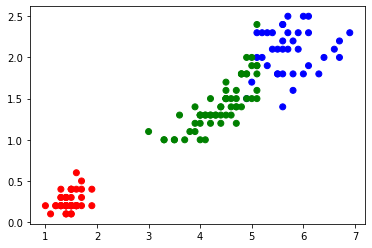

In [2]:
# Initialisation de X : le dataframe contenant les features qui vont servir pour l'entraînement
X = df[["petal.length", "petal.width", "sepal.length", "sepal.width"]]
y = df["variety"]

# Définition du modèle 
model = KMeans(
    n_clusters=3,
    max_iter=100
)

# Entraînement et prédiction 
y_km = model.fit_predict(X)

# Visualisation 
colormap = np.array(['Red', 'green', 'blue'])
plt.scatter(df[["petal.length"]], df[["petal.width"]], c = colormap[model.labels_])

## Hyper-paramètres
* n_cluster = Le nombre de cluster ***int***
* init = Méthode d'initialisation ***{'k-means++', 'random'}***
    * k-means++ : initialisation otpimisée pour une convergence rapide
    * random : initialisation aléatoire
* n_init = Nombre de d'exécutions différentes de l'algorithme (le meilleur résultats sera gardé) ***int***
* max_iter = Nombre d'itération maximale pour une exécution ***int***
* verbose = Le mode d'affichage ***{0, 1}***
    * 0 : Aucun affichage
    * 1 : Affichage activé
* algorithm : Algorithme utilisé ***{'auto', 'full', 'elkan'}***
    * auto : sélectionne l'algo **elkan** (susceptible au changement)
    * full : algorithme de base
    * elkan : algorithme plus efficace pour les clusters bien définis (mais consomme un peu plus de RAM)


## Score et Inertie
Comme c'est un algorithme d'affectation de cluster il n'y a pas de méthode précise pour calculer leur efficacité. <br>
Si les labels sont connus il vaudra probablement mieux d'utiliser un algorithme de Classification.

La seule valeur utile pour se faire une idée du modèle entraîné est l'**inertie** : la somme de toutes les distances entre les points et le centre de leur cluster
* Plus l'inertie est faible, plus le dataset est clairement défini et peu éparpillé (Bien)
* Plus l'inertie est forte, plus les points sont éparpillés loins du centre de leur cluster (Moins bien)

In [14]:
print("Model score : \t" +  str(model.score(X)))
print("Inertie : \t" + str(model.inertia_))

Model score : 	-78.85144142614602
Inertie : 	78.851441426146
